In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import linear_model

%matplotlib inline

In [60]:
def computeCost(X, y, theta):
    m = len(y)
    J = np.sum(np.power(X * theta - y, 2) / (2 * m))
    return J

In [61]:
def gradientDescent(X, y, theta, alpha, num_iters):
    [m, n] = y.shape
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        sigma = (X * theta - y).T * X / m
        theta = theta - (alpha * sigma.T)
        J_history[iter] = computeCost(X, y, theta)
     
    print(theta)
    return theta, J_history

In [194]:
## ======================= Part 2: Plotting =======================
print('Ploting Data ...')
data = pd.read_csv('ex1data2.txt', sep=',', names=['Size', 'Bedrooms', 'Price'])
data.head()

Ploting Data ...


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [195]:
# Feature Scaling 
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [196]:
# add 1 column
data.insert(0, 'Ones', 1)

In [197]:
[m, n] = data.shape
X = data.iloc[:, 0 : n - 1]
y = data.iloc[:, n - 1 : n]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.zeros((3, 1))

In [198]:
alpha = 0.01
iters = 1000

weight, cost = gradientDescent(X, y, theta, alpha, iters)
weight1, cost1 = gradientDescent(X, y, theta, 0.1, iters)
weight2, cost2 = gradientDescent(X, y, theta, 0.3, iters)
weight3, cost3 = gradientDescent(X, y, theta, 0.5, iters)
computeCost(X, y, weight)

0.13070336960771892

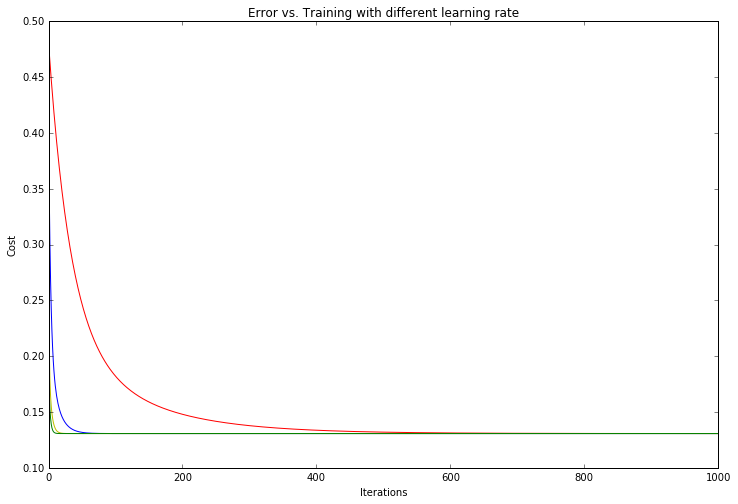

In [199]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.plot(np.arange(iters), cost1, 'b')
ax.plot(np.arange(iters), cost2, 'y')
ax.plot(np.arange(iters), cost3, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training with different learning rate')

In [226]:
data1 = pd.read_csv('ex1data1.txt', sep=',', names=['Population', 'Profit'])
data1.insert(0, 'Ones', 1)
data1.head()
# X = data.iloc(:, )
[m1, n1] = data1.shape

In [233]:
X1_values = data1.iloc[:, 1:n1-1].values
y1_values = data1.iloc[:, n1-1:n1].values
# x = np.array(X1_values[:,  0].A1)
X1_values.shape
# x.shape

(97, 1)

In [234]:
## ==================== Part 2: sklearn linear regression ====================
model = linear_model.LinearRegression()

model.fit(X1_values, y1_values)
predict1 = model.predict(X1_values).flatten()

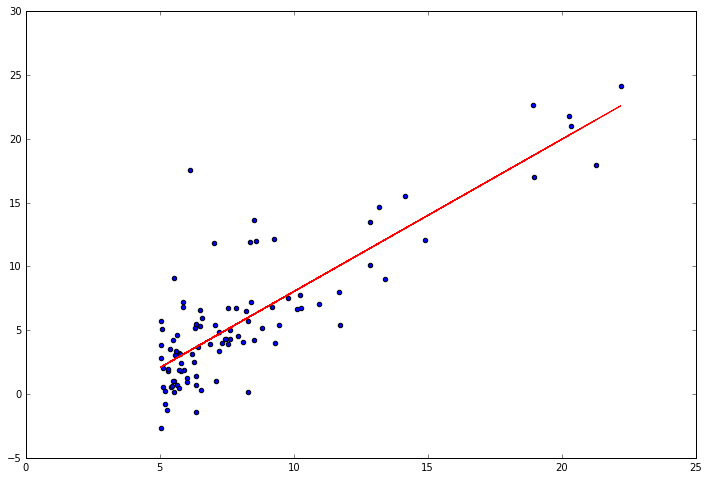

In [240]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data1.Population, y1_values, label='Traning Data')
ax.plot(X1_values, predict1, 'r', label='Prediction')